DATA LOADING AND INSPECTION
-------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler


#Classifier module
from sklearn.tree import DecisionTreeClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
------------
Encoding
--------

In [3]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
---------------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
---------

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING¶
------------
DECISIONTREECLASSIFIER
-------------

In [7]:
#Initialize the Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

#Train the model
dt.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_dt = dt.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
auc_roc = roc_auc_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy :.4f}")
print(f"Decision Tree Classifier Precision: {precision :.4f}")
print(f"Decision Tree Classifier recall: {recall :.4f}")
print(f"Decision Tree Classifier f1_score: {f1 :.4f}")
print(f"Decision Tree Classifier auc_roc: {auc_roc :.4f}")

print(classification_report(y_test, y_pred_dt))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", dt.score(X_train, y_train))

print("Testing Accuracy :", dt.score(X_test, y_test))

Decision Tree Classifier Accuracy: 0.9117
Decision Tree Classifier Precision: 0.6549
Decision Tree Classifier recall: 0.8409
Decision Tree Classifier f1_score: 0.7363
Decision Tree Classifier auc_roc: 0.8824
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       512
         1.0       0.65      0.84      0.74        88

    accuracy                           0.91       600
   macro avg       0.81      0.88      0.84       600
weighted avg       0.92      0.91      0.92       600

Confusion Matrix:
 [[473  39]
 [ 14  74]]
ROC AUC Score: 0.8823686079545454
Training Accuracy : 1.0
Testing Accuracy : 0.9116666666666666


CONFUSION MATRIX FOR DECISION TREE CLASSIFIER
----------------------

In [8]:
y_pred_dt = dt.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_dt).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 74
False positives: 39
True negatives: 473
False negatives: 14



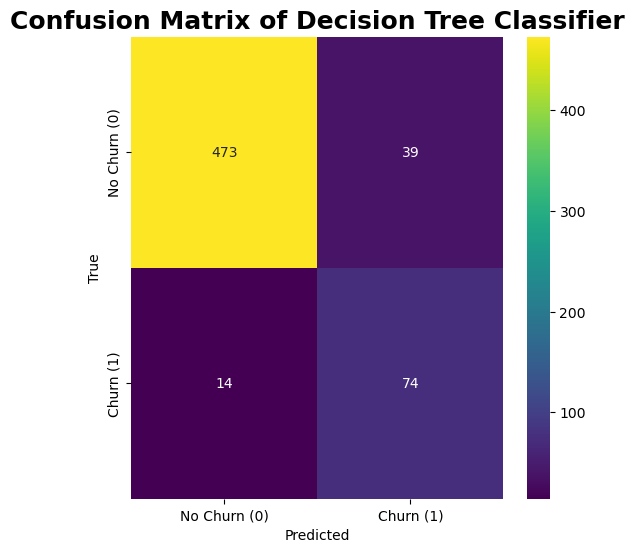

In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Decision Tree Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

EVALUATION OF THE MACHINE LEARNING ALGORITHMS
------------------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["DecisionTree Classifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_dt)*100],
                         "PRECISION":[precision_score(y_test, y_pred_dt)*100],
                          "RECALL":[recall_score(y_test, y_pred_dt)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_dt)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_dt)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,DecisionTree Classifier,91.166667,65.486726,84.090909,73.631841,88.236861


K_FOLD CROSS VALIDATION
------------

ACCURACY
--------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#log_reg = LogisticRegression()
dt_accuracies = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(dt_accuracies)
dt_avg_accuracy = np.mean(dt_accuracies)
dt_std_accuracy = np.std(dt_accuracies)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_accuracy * 100:.2f}%")

[0.93589744 0.93162393 0.9017094  0.9465812  0.92521368 0.91239316
 0.93147752 0.92077088 0.91862955 0.93576017]
The std score of cross validation using DecisionTree Classifier algorithm is 1.24%
The mean score of cross validation using DecisionTree Classifier algorithm is 92.60%


PRECISON
----

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

dt_precision = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(dt_precision)
dt_avg_precision = np.mean(dt_precision)
dt_std_precision = np.std(dt_precision)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_precision * 100:.2f}%")

[0.92857143 0.91393443 0.8852459  0.93723849 0.91286307 0.907173
 0.8972332  0.89837398 0.92608696 0.925     ]
The std score of cross validation using DecisionTree Classifier algorithm is 1.55%
The mean score of cross validation using DecisionTree Classifier algorithm is 91.32%


RECALL
---

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

dt_recall = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(dt_recall)
dt_avg_recall = np.mean(dt_recall)
dt_std_recall = np.std(dt_recall)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_recall * 100:.2f}%")

[0.94444444 0.95299145 0.92307692 0.95726496 0.94017094 0.91880342
 0.97424893 0.94849785 0.91025641 0.94871795]
The std score of cross validation using DecisionTree Classifier algorithm is 1.84%
The mean score of cross validation using DecisionTree Classifier algorithm is 94.18%


F1_SCORE
------

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

dt_f1 = cross_val_score(dt, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(dt_f1)
dt_avg_f1 = np.mean(dt_f1)
dt_std_f1 = np.std(dt_f1)
print(f"The std score of cross validation using DecisionTree Classifier algorithm is {dt_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using DecisionTree Classifier algorithm is {dt_avg_f1 * 100:.2f}%")

[0.94444444 0.95299145 0.92307692 0.95726496 0.94017094 0.91880342
 0.97424893 0.94849785 0.91025641 0.94871795]
The std score of cross validation using DecisionTree Classifier algorithm is 1.84%
The mean score of cross validation using DecisionTree Classifier algorithm is 94.18%


CHECKING IF IT IS OVERFITTING OR NOT
-----------

In [15]:
#DecisionTreeClassifier

if dt_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test accuracy")

Model generalizes well: Cross_validation accuracy is higher or close to test accuracy


In [16]:
#DecisionTreeClassifier

if dt_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test precision")

Model generalizes well: Cross_validation accuracy is higher or close to test precision


In [17]:
#DecisionTreeClassifier

if dt_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test recall")

Model generalizes well: Cross_validation accuracy is higher or close to test recall


In [18]:
#DecisionTreeClassifier

if dt_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test f1_score")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test f1_score")

Model generalizes well: Cross_validation accuracy is higher or close to test f1_score


TOTAL AVERAGE KFOLD
--------------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["DecisionTree Classifier"], 
                           "ACCURACY":[dt_avg_accuracy * 100],
                         "PRECISION":[dt_avg_precision * 100],
                          "RECALL":[dt_avg_recall * 100],
                          "F1_SCORE":[dt_avg_f1 * 100],  
                           
                        })

final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,DecisionTree Classifier,92.600569,91.317205,94.184733,94.184733
